In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("iris.data")
dados

,Sep_Comp,Sep_Larg,Pet_Comp,Pet_Larg,Especies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dados.shape

(150, 5)

**Esse é o mapa de calor com entrada como matriz de correlação, onde podemos verificar que o comprimento e largura da sépala não estão correlacionados. Por outro lado, o comprimento e largura da pétala estão altamente correlacionados.**

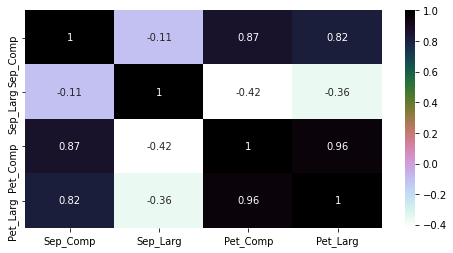

In [4]:
plt.figure(figsize=(8,4))
sns.heatmap(dados.corr(), annot=True, cmap='cubehelix_r')
plt.show()

**Separamos 70% dos dados para treino e os 30% restantes para teste.**

In [5]:
train, test = train_test_split(dados, test_size=0.3)
train.shape, test.shape

((105, 5), (45, 5))

In [6]:
train_X = train[['Sep_Comp','Sep_Larg','Pet_Comp','Pet_Larg']]
train_y = train.Especies

test_X = test[['Sep_Comp','Sep_Larg','Pet_Comp','Pet_Larg']]
test_y = test.Especies

In [7]:
train_X.head()

,Sep_Comp,Sep_Larg,Pet_Comp,Pet_Larg
48,5.3,3.7,1.5,0.2
37,4.9,3.1,1.5,0.1
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
108,6.7,2.5,5.8,1.8


In [8]:
test_X.head()

,Sep_Comp,Sep_Larg,Pet_Comp,Pet_Larg
130,7.4,2.8,6.1,1.9
109,7.2,3.6,6.1,2.5
84,5.4,3.0,4.5,1.5
134,6.1,2.6,5.6,1.4
135,7.7,3.0,6.1,2.3


**Modelo**

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(train_X, train_y)
for feature,importance in zip(dados.columns,modelo.feature_importances_):
    print("{}:{}".format(feature, importance))
prediction = modelo.predict(test_X)
print('A acurácia da Árvore de Decisão é: ', round((metrics.accuracy_score(prediction, test_y))*100,2),'%')

Sep_Comp:0.0
Sep_Larg:0.026552287581699353
Pet_Comp:0.05509754406813227
Pet_Larg:0.9183501683501685
A acurácia da Árvore de Decisão é:  97.78 %


**Com o comando *modelo.features_importances_* podemos enxergar qual a categoria o modelo considerou mais importante. No caso, o comprimento da pétala, da qual confirma com o mapa de calor a alta correlação. Com isso nosso modelo retornou uma acurácia de 97,78%, que demonstra uma alta perfomance do modelo.**

**Agora vamos avaliar os dados separadamente: Pétalas e Sépalas.**

In [10]:
petal = dados[['Pet_Comp','Pet_Larg','Especies']]
sepal = dados[['Sep_Comp','Sep_Larg','Especies']]

*Critério de divisão dos dados continuam os mesmos. 70% treino e 30% teste.*

**Pétalas**

In [11]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) 
train_x_p = train_p[['Pet_Comp','Pet_Larg']]
train_y_p = train_p.Especies

test_x_p = test_p[['Pet_Comp','Pet_Larg']]
test_y_p = test_p.Especies

**Sépalas**

In [12]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0)
train_x_s = train_s[['Sep_Comp','Sep_Larg']]
train_y_s = train_s.Especies

test_x_s = test_s[['Sep_Comp','Sep_Larg']]
test_y_s = test_s.Especies

**Modelo para pétalas**

In [14]:
modelo=DecisionTreeClassifier()
modelo.fit(train_x_p,train_y_p) 
for feature,importance in zip(petal.columns,modelo.feature_importances_):
    print("{}:{}".format(feature, importance))
prediction=modelo.predict(test_x_p) 
print('A acurácia da Árvore de Decisão usando as pétalas é: ',round((metrics.accuracy_score(prediction,test_y_p)*100),2), "%")

Pet_Comp:0.9139443012840827
Pet_Larg:0.0860556987159173
A acurácia da Árvore de Decisão usando as pétalas é:  95.56 %


**Modelo para sépalas**

In [15]:
modelo=DecisionTreeClassifier()
modelo.fit(train_x_s,train_y_s)
for feature,importance in zip(sepal.columns,modelo.feature_importances_):
    print("{}:{}".format(feature, importance)) 
prediction=modelo.predict(test_x_s) 
print('A acurácia da Árvore de Decisão usando as sépalas é:',round((metrics.accuracy_score(prediction,test_y_s)*100),2), "%")

Sep_Comp:0.7604515747119392
Sep_Larg:0.23954842528806064
A acurácia da Árvore de Decisão usando as sépalas é: 64.44 %


**Comparando os modelos acima, podemos ver que o uso de pétalas sobre sépalas tem uma acurácia muito superior (Pétalas = 95,56%; Sépalas = 64,44%). No mapa de calor, a pétala exibia uma alta correlação entre largura e comprimento, o que era esperado sobre os resultados individuais dos modelos de pétalas e sépalas. Com isso, obtemos com nosso algoritmo uma acurácia superior a 97%.**